## Homework 5
- Harshvardhan
- Student Id: 609162

In [43]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def perceptron(X, Y, max_i = 10):
    dim = X.shape[1]
    w = np.random.uniform(0,1,dim)
    b = np.random.uniform(0,1,1)
    for i in range(max_i):
        mismatch = 0
        for j in range(X.shape[0]):
            yhat = predict(X[j,:], w, b)
            if (yhat != Y[j]):
                mismatch = mismatch + 1
                w = w + X[j,:]*(Y[j]-yhat)
                b = b - (Y[j]- yhat)
                print(w, b)
            print(f"Epoch: {i} Iter: {j} Input: {X[j,:]} Y: {Y[j]} Y_hat: {yhat}")
        if(mismatch == 0):
            break
    return w, b

In [3]:
# step function
def step(x):
    if x>= 0:
        return 1
    else:
        return 0
# predict
def predict(x, w, b):
    u = np.dot(w, x) - b
    y = step(u)
    return y

In [25]:
# XOR Gate
# assuming c = 1
rt = np.sqrt(2)

X = np.array([[1,1,rt,-rt, -rt, 1],[1,1,-rt,rt,-rt,1],[1,1,-rt,-rt,rt,1],[1,1,rt,rt,rt,1]])
Y = np.array([-1,1,1,-1])

In [26]:
X.shape

(4, 6)

In [27]:
w, b = perceptron(X,Y)

[-0.49301347 -0.33775988 -1.24150713  1.93503543  1.91630496 -0.44247904] [1.68158362]
Epoch: 0 Iter: 0 Input: [ 1.          1.          1.41421356 -1.41421356 -1.41421356  1.        ] Y: -1 Y_hat: 0
[ 0.50698653  0.66224012 -2.6557207   3.34924899  0.5020914   0.55752096] [0.68158362]
Epoch: 0 Iter: 1 Input: [ 1.          1.         -1.41421356  1.41421356 -1.41421356  1.        ] Y: 1 Y_hat: 0
Epoch: 0 Iter: 2 Input: [ 1.          1.         -1.41421356 -1.41421356  1.41421356  1.        ] Y: 1 Y_hat: 1
[-1.49301347 -1.33775988 -5.48414782  0.52082186 -2.32633572 -1.44247904] [2.68158362]
Epoch: 0 Iter: 3 Input: [1.         1.         1.41421356 1.41421356 1.41421356 1.        ] Y: -1 Y_hat: 1
[-2.49301347 -2.33775988 -6.89836138  1.93503543 -0.91212216 -2.44247904] [3.68158362]
Epoch: 1 Iter: 0 Input: [ 1.          1.          1.41421356 -1.41421356 -1.41421356  1.        ] Y: -1 Y_hat: 0
Epoch: 1 Iter: 1 Input: [ 1.          1.         -1.41421356  1.41421356 -1.41421356  1.       

In [28]:
w

array([-12.49301347, -12.33775988, -40.83948688,  -0.8933917 ,
        -0.91212216, -12.44247904])

In [29]:
b

array([13.68158362])

In [34]:
# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = -2, 2
y_min, y_max = -2, 2
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))
xy_array = np.c_[xx.ravel(), yy.ravel()]

In [35]:
# project each point to 6d
def project_6d(X, c = 1):
    # X has to have two columns
    pp = np.zeros((X.shape[0], 6))
    
    for i in range(X.shape[0]):
        xx = X[i]
        t1 = (xx[1])**2
        t2 = (xx[0])**2
        t3 = np.sqrt(2)*xx[0]*xx[1]
        t4 = np.sqrt(2*c)*xx[1]
        t5 = np.sqrt(2*c)*xx[0]
        t6 = c
        pp[i,:] = t1, t2, t3, t4, t5, t6

    return pp    

In [40]:
xy_projected = project_6d(xy_array)
xy_projected.shape

(1600, 6)

In [41]:
# finding predicted labels for each point
yhat = np.ones(xy_projected.shape[0])
for i in range(xy_projected.shape[0]):
    yhat[i] = predict(xy_projected[i], w, b)

print(yhat)

[0. 0. 0. ... 0. 0. 0.]


Text(0.5, 1.0, 'Decision Boundary')

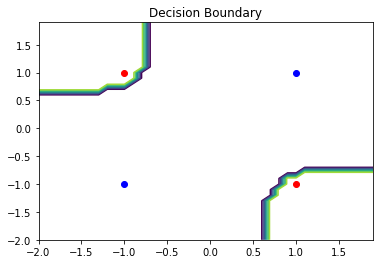

In [59]:
z = yhat.reshape((len(xx), len(yy)))
plt.contour(xx, yy, z)
plt.plot(-1,-1, "ro", c = "blue")
plt.plot(1,-1, "ro")
plt.plot(-1,1, "ro")
plt.plot(1,1, "ro", c = "blue")
plt.title("Decision Boundary")